2.17.0
29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  

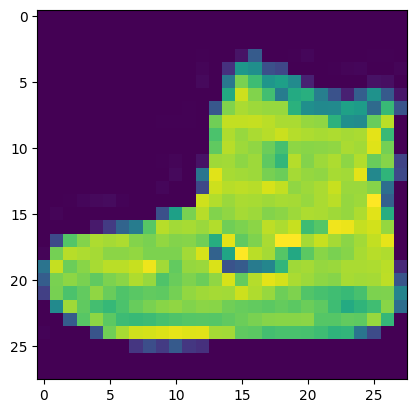

In [1]:
#Start by importing TensorFlow.
import tensorflow as tf
print(tf.__version__)

# Train a neural network to recognize items of clothing from a common dataset called Fashion MNIST. It contains 70,000 items of clothing in 10 different categories. Each item of clothing is in a 28x28 grayscale image.
#The Fashion MNIST data is available in the tf.keras.datasets API. Load it like this:
mnist = tf.keras.datasets.fashion_mnist

#Calling load_data on that object gives you two sets of two lists: training values and testing values, which represent graphics that show clothing items and their labels.
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

# Print a training image and a training label to see. You can experiment with different indices in the array.

import matplotlib.pyplot as plt
plt.imshow(training_images[0])
print(training_labels[0])
print(training_images[0])

In [6]:
#You'll notice that all the values are integers between 0 and 255. When training a neural network, it's easier to treat all values as between 0 and 1, a process called normalization.
training_images  = training_images / 255.0
test_images = test_images / 255.0

#Design the model
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

#Sequential defines a sequence of layers in the neural network.
#Flatten takes a square and turns it into a one-dimensional vector.
#Dense adds a layer of neurons.
#Activation functions tell each layer of neurons what to do. There are lots of options, but use these for now:
#Relu effectively means that if X is greater than 0 return X, else return 0. It only passes values of 0 or greater to the next layer in the network.
#Softmax takes a set of values, and effectively picks the biggest one. For example, if the output of the last layer looks like [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05], then it saves you from having to sort for the largest value—it returns [0,0,0,0,1,0,0,0,0].

#Compile and train the model
#Now that the model is defined, the next thing to do is build it. Create a model by first compiling it with an optimizer and loss function, then train it on your training data and labels. The goal is to have the model figure out the relationship between the training data and its training labels.
#The use of metrics = as a parameter, which allows TensorFlow to report on the accuracy of the training by checking the predicted results against the known answers (the labels).
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.0980 - loss: 2.3028
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.0997 - loss: 2.3027
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.0946 - loss: 2.3028
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.1002 - loss: 2.3028
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.0963 - loss: 2.3028


In [3]:
#Test the model
model.evaluate(test_images, test_labels)
#That example returned an accuracy of .8789, meaning it was about 88% accurate. (You might have slightly different values.)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8768 - loss: 0.3482


[0.34946417808532715, 0.8779000043869019]

In [4]:
#Exploration exercises
classifications = model.predict(test_images)
print(classifications[0])
#It creates a set of classifications for each of the test images, then prints the first entry in the classifications. The output after you run it is a list of numbers
print(test_labels[0])

#Why do you think that is and what do those numbers represent?

#The output of the model is a list of 10 numbers. Those numbers are a probability that the value being classified is the corresponding label. For example, the first value in the list is the probability that the clothing is of class 0 and the next is a 1. Notice that they are all very low probabilities except one. Also, because of Softmax, all the probabilities in the list sum to 1.0.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[5.1544868e-07 2.6786915e-07 5.8049004e-08 6.7739521e-09 2.2395000e-08
 1.3385836e-02 5.6780414e-07 4.8621472e-02 1.6460455e-05 9.3797487e-01]
9


Exercise 2
Look at the layers in your model. Experiment with different values for the dense layer with 512 neurons.

What different results do you get for loss and training time? Why do you think that's the case?

For example, if you increase to 1,024 neurons, you have to do more calculations, slowing down the process. But in this case they have a good impact because the model is more accurate. That doesn't mean more is always better. You can hit the law of diminishing returns very quickly.


What would happen if you remove the Flatten() layer. Why do you think that's the case?

You get an error about the shape of the data. The details of the error may seem vague right now, but it reinforces the rule of thumb that the first layer in your network should be the same shape as your data. Right now your data is 28x28 images, and 28 layers of 28 neurons would be infeasible, so it makes more sense to flatten that 28,28 into a 784x1.

Instead of writing all the code, add the Flatten() layer at the beginning. When the arrays are loaded into the model later, they'll automatically be flattened for you.


Consider the final (output) layers. Why are there 10 of them? What would happen if you had a different amount than 10?

Try training the network with 5. You get an error as soon as it finds an unexpected value. Another rule of thumb—the number of neurons in the last layer should match the number of classes you are classifying for. In this case, it's the digits 0 through 9, so there are 10 of them, and hence you should have 10 neurons in your final layer.

In [7]:
#Before you trained, you normalized the data, going from values that were 0 through 255 to values that were 0 through 1. What would be the impact of removing that? Here's the complete code to give it a try (note that the two lines that normalize the data are commented out).
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
#training_images=training_images/255.0
#test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels)
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

2.17.0
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - loss: 15.1978
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - loss: 0.5533
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 0.5105
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 0.5305
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 0.4883
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7177
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[3.6872791e-20 3.6624262e-19 8.6621759e-26 3.8322521e-18 3.0282677e-25
 1.0379780e-01 3.0551962e-19 4.7754612e-02 9.4516178e-17 8.4844762e-01]
9


Why do we do Normalization?

Normalization reduces the complexity of the problem your network is trying to solve. This can potentially increase the accuracy of your model and speed up the training. You bring the data on the same scale and reduce variance. None of the weights in the network are wasted on doing a normalization for you, meaning that they can be used more efficiently to solve the actual task at hand.

In [8]:
#Explore callbacks
#Earlier, when you trained for extra epochs, you had an issue where your loss might change. It might have taken a bit of time for you to wait for the training to do that and you might have thought that it'd be nice if you could stop the training when you reach a desired value, such as 95% accuracy. If you reach that after 3 epochs, why sit around waiting for it to finish a lot more epochs?
# for that
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.95):
      print("\nReached 95% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7948 - loss: 0.5791
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8658 - loss: 0.3649
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.8829 - loss: 0.3181
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8908 - loss: 0.2942
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8976 - loss: 0.2771
